*This notebook assumes to be launched inside the source root and it uses relative path to obtain other resources.*

Test MapD->PyGDF->matrix->H2OAIGLM->ANIMATION

In [1]:
# run=0: Choose not run h2oaiglm and just pass through all other cells
# run=1: Run h2oaiglm without animation
# Control run with nGPUs, nFolds>=0, nAlphas>=1, nLambdas>=2
# Where nGPUs=0 will use CPU for same exact fit
# Should ensure NGPUs no larger than physical number
run=1

# anim=0: Don't show animation
# anim=1: Do show animation
# pip install pandas psutil matplotlib --user
# pip install -e git+https://github.com/fbcotter/py3nvml#egg=py3nvml --user
anim=1

PWD = !pwd

In [2]:
import sys
import os.path
from pprint import pprint

Add import path to MapD Thrift binding and Arrow schema

In [3]:
thirdparty_path = os.path.join(PWD[0], '..', 'thirdparty')
sys.path.append(thirdparty_path)
thirdparty_path

'/home/vinod/Downloads/pygdf/notebooks/../thirdparty'

If `pygdf` cannot be imported, uncomment code below:

In [4]:
pygdf_path = os.path.join(PWD[0], '..')
sys.path.append(pygdf_path)

In [5]:
import pygdf

In [6]:
from thrift.protocol import TBinaryProtocol
from thrift.protocol import TJSONProtocol
from thrift.transport import TSocket
from thrift.transport import THttpClient
from thrift.transport import TTransport

In [7]:
from mapd import MapD
from mapd import ttypes

MapD connection

In [8]:
def get_client(host_or_uri, port, http):
  if http:
    transport = THttpClient.THttpClient(host_or_uri)
    protocol = TJSONProtocol.TJSONProtocol(transport)
  else:
    socket = TSocket.TSocket(host_or_uri, port)
    transport = TTransport.TBufferedTransport(socket)
    protocol = TBinaryProtocol.TBinaryProtocol(transport)

  client = MapD.Client(protocol)
  transport.open()
  return client

In [9]:
db_name = 'mapd'
user_name = 'mapd'
passwd = 'HyperInteractive'
hostname = 'localhost'
portno = 9091

client = get_client(hostname, portno, False)
session = client.connect(user_name, passwd, db_name)
print('Connection complete')

Connection complete


The Query

In [10]:
columns = """
INCEARN,RECTYPE,IPUMS_YEAR,DATANUM,SERIAL,NUMPREC,SUBSAMP,HHWT,HHTYPE,REPWT,ADJUST,CPI99,REGION,STATEICP,STATEFIP,COUNTY,COUNTYFIPS,METRO,METAREA,METAREAD,MET2013,MET2013ERR,CITY,CITYERR,CITYPOP,PUMA,PUMARES2MIG,STRATA,PUMASUPR,CONSPUMA,CPUMA0010,APPAL,APPALD,HOMELAND,MET2003,CNTRY,GQ,GQTYPE,GQTYPED,FARM,OWNERSHP,OWNERSHPD,MORTGAGE,MORTGAG2,COMMUSE,FARMPROD,ACREHOUS,MORTAMT1,MORTAMT2,TAXINCL,INSINCL,PROPINSR,PROPTX99,OWNCOST,RENT,RENTGRS,RENTMEAL,CONDOFEE,MOBLHOME,MOBLHOM2,MOBLOAN,SECRES,SECRESMO,SECRESRE,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,PUBHOUS,RENTSUB,HEATSUB,LUNCHSUB,FOODSTMP,FDSTPAMT,VALUEH,LINGISOL,VACANCY,KITCHEN,KITCHENORIG,FRIDGE,FRIDGEORIG,SINK,STOVE,ROOMS,ROOMSORIG,PLUMBING,HOTWATER,SHOWER,TOILET,BUILTYR,BUILTYR2,UNITSSTR,BEDROOMS,BEDROOMSORIG,PHONE,PHONEORIG,CILAPTOP,CIHAND,CIOTHCOMP,CINETHH,CIMODEM,CISAT,CIDSL,CIFIBER,CIBRDBND,CIDIAL,CIOTHSVC,FUELHEAT,VEHICLES,SSMC,NFAMS,NSUBFAM,NCOUPLES,NMOTHERS,NFATHERS,MULTGEN,MULTGEND,CBNSUBFAM,REPWT1,REPWT2,REPWT3,REPWT4,REPWT5,REPWT6,REPWT7,REPWT8,REPWT9,REPWT10,REPWT11,REPWT12,REPWT13,REPWT14,REPWT15,REPWT16,REPWT17,REPWT18,REPWT19,REPWT20,REPWT21,REPWT22,REPWT23,REPWT24,REPWT25,REPWT26,REPWT27,REPWT28,REPWT29,REPWT30,REPWT31,REPWT32,REPWT33,REPWT34,REPWT35,REPWT36,REPWT37,REPWT38,REPWT39,REPWT40,REPWT41,REPWT42,REPWT43,REPWT44,REPWT45,REPWT46,REPWT47,REPWT48,REPWT49,REPWT50,REPWT51,REPWT52,REPWT53,REPWT54,REPWT55,REPWT56,REPWT57,REPWT58,REPWT59,REPWT60,REPWT61,REPWT62,REPWT63,REPWT64,REPWT65,REPWT66,REPWT67,REPWT68,REPWT69,REPWT70,REPWT71,REPWT72,REPWT73,REPWT74,REPWT75,REPWT76,REPWT77,REPWT78,REPWT79,REPWT80,RESPMODE,PERNUM,PERWT,SLWT,REPWTP,FAMSIZE,NCHILD,NCHLT5,FAMUNIT,ELDCH,YNGCH,NSIBS,MOMLOC,STEPMOM,MOMRULE,POPLOC,STEPPOP,POPRULE,SPLOC,SPRULE,SUBFAM,SFTYPE,SFRELATE,CBSUBFAM,CBSFTYPE,CBSFRELATE,RELATE,RELATED,SEX,AGE,AGEORIG,BIRTHQTR,MARST,BIRTHYR,MARRNO,MARRINYR,YRMARR,DIVINYR,WIDINYR,FERTYR,RACE,RACED,HISPAN,HISPAND,BPL,BPLD,ANCESTR1,ANCESTR1D,ANCESTR2,ANCESTR2D,CITIZEN,YRNATUR,YRIMMIG,YRSUSA1,YRSUSA2,SPOKEN_LANGUAGE,LANGUAGED,SPEAKENG,TRIBE,TRIBED,RACESING,RACESINGD,RACAMIND,RACASIAN,RACBLK,RACPACIS,RACWHT,RACOTHER,RACNUM,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,SCHLTYPE,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,LABFORCE,OCC,OCC1950,OCC1990,OCC2010,IND,IND1950,IND1990,CLASSWKR,CLASSWKRD,OCCSOC,INDNAICS,WKSWORK1,WKSWORK2,UHRSWORK,WRKLSTWK,ABSENT,LOOKING,AVAILBLE,WRKRECAL,WORKEDYR,POVERTY,OCCSCORE,SEI,HWSEI,PRESGL,PRENT,ERSCOR50,ERSCOR90,EDSCOR50,EDSCOR90,NPBOSS50,NPBOSS90,MIGRATE1,MIGRATE1D,MIGPLAC1,MIGMET1,MIGTYPE1,MIGCITY1,MIGPUMS1,MIGPUMA1,MOVEDIN,MOVEDINORIG,DISABWRK,VETDISAB,DIFFREM,DIFFPHYS,DIFFMOB,DIFFCARE,DIFFSENS,DIFFEYE,DIFFHEAR,VETSTAT,VETSTATD,VET01LTR,VET95X00,VET90X01,VET90X95,VET75X90,VET80X90,VET75X80,VETVIETN,VET55X64,VETKOREA,VET47X50,VETWWII,VETOTHER,VETYRS,PWSTATE2,PWMETRO,PWCITY,PWTYPE,PWPUMA00,PWPUMAS,TRANWORK,CARPOOL,RIDERS,TRANTIME,DEPARTS,ARRIVES,GCHOUSE,GCMONTHS,GCRESPON,PROBAI,PROBAPI,PROBBLK,PROBOTH,PROBWHT,REPWTP1,REPWTP2,REPWTP3,REPWTP4,REPWTP5,REPWTP6,REPWTP7,REPWTP8,REPWTP9,REPWTP10,REPWTP11,REPWTP12,REPWTP13,REPWTP14,REPWTP15,REPWTP16,REPWTP17,REPWTP18,REPWTP19,REPWTP20,REPWTP21,REPWTP22,REPWTP23,REPWTP24,REPWTP25,REPWTP26,REPWTP27,REPWTP28,REPWTP29,REPWTP30,REPWTP31,REPWTP32,REPWTP33,REPWTP34,REPWTP35,REPWTP36,REPWTP37,REPWTP38,REPWTP39,REPWTP40,REPWTP41,REPWTP42,REPWTP43,REPWTP44,REPWTP45,REPWTP46,REPWTP47,REPWTP48,REPWTP49,REPWTP50,REPWTP51,REPWTP52,REPWTP53,REPWTP54,REPWTP55,REPWTP56,REPWTP57,REPWTP58,REPWTP59,REPWTP60,REPWTP61,REPWTP62,REPWTP63,REPWTP64,REPWTP65,REPWTP66,REPWTP67,REPWTP68,REPWTP69,REPWTP70,REPWTP71,REPWTP72,REPWTP73,REPWTP74,REPWTP75,REPWTP76,REPWTP77,REPWTP78,REPWTP79,REPWTP80
""".strip()
print(len(columns.split(',')))

447


In [11]:
query = "SELECT {} FROM ipums_easy WHERE INCEARN > 100;".format(columns)
print('Query is : ' + query)

# always use True for is columnar
results = client.sql_execute_cudf(session, query, device_id=0, first_n=-1)

Query is : SELECT INCEARN,RECTYPE,IPUMS_YEAR,DATANUM,SERIAL,NUMPREC,SUBSAMP,HHWT,HHTYPE,REPWT,ADJUST,CPI99,REGION,STATEICP,STATEFIP,COUNTY,COUNTYFIPS,METRO,METAREA,METAREAD,MET2013,MET2013ERR,CITY,CITYERR,CITYPOP,PUMA,PUMARES2MIG,STRATA,PUMASUPR,CONSPUMA,CPUMA0010,APPAL,APPALD,HOMELAND,MET2003,CNTRY,GQ,GQTYPE,GQTYPED,FARM,OWNERSHP,OWNERSHPD,MORTGAGE,MORTGAG2,COMMUSE,FARMPROD,ACREHOUS,MORTAMT1,MORTAMT2,TAXINCL,INSINCL,PROPINSR,PROPTX99,OWNCOST,RENT,RENTGRS,RENTMEAL,CONDOFEE,MOBLHOME,MOBLHOM2,MOBLOAN,SECRES,SECRESMO,SECRESRE,COSTELEC,COSTGAS,COSTWATR,COSTFUEL,PUBHOUS,RENTSUB,HEATSUB,LUNCHSUB,FOODSTMP,FDSTPAMT,VALUEH,LINGISOL,VACANCY,KITCHEN,KITCHENORIG,FRIDGE,FRIDGEORIG,SINK,STOVE,ROOMS,ROOMSORIG,PLUMBING,HOTWATER,SHOWER,TOILET,BUILTYR,BUILTYR2,UNITSSTR,BEDROOMS,BEDROOMSORIG,PHONE,PHONEORIG,CILAPTOP,CIHAND,CIOTHCOMP,CINETHH,CIMODEM,CISAT,CIDSL,CIFIBER,CIBRDBND,CIDIAL,CIOTHSVC,FUELHEAT,VEHICLES,SSMC,NFAMS,NSUBFAM,NCOUPLES,NMOTHERS,NFATHERS,MULTGEN,MULTGEND,CBNSUBFAM,REPWT1,REPWT2,REPWT3,R

In [12]:
results

TCuDataFrame(df_size=15857760, df_handle=b'\x00)\x0c\x04\x00\x00\x00\x00\xa02\x00\x00\x00\x00\x00\x00`\xf8\xf1\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\xd5\x00\x00\x00\x00\x00\x00\x00\xc2\x00\xd0\xc1\xf7\x01\x00\\', schema=b'\x10\x00\x00\x00\x0c\x00\x0e\x00\x06\x00\x05\x00\x08\x00\x00\x00\x0c\x00\x00\x00\x00\x01\x01\x00\x10\x00\x00\x00\x00\x00\n\x00\x08\x00\x00\x00\x04\x00\x00\x00\n\x00\x00\x00\x04\x00\x00\x00\xbf\x01\x00\x00\xac\x91\x00\x00D\x91\x00\x00\xec\x90\x00\x00\x98\x90\x00\x00D\x90\x00\x00\xf0\x8f\x00\x00\x9c\x8f\x00\x00H\x8f\x00\x00\xf4\x8e\x00\x00\x9c\x8e\x00\x00L\x8e\x00\x00\xfc\x8d\x00\x00\xa8\x8d\x00\x00P\x8d\x00\x00\xf8\x8c\x00\x00\xa8\x8c\x00\x00T\x8c\x00\x00\x04\x8c\x00\x00\xb4\x8b\x00\x00`\x8b\x00\x00\x10\x8b\x00\x00\xbc\x8a\x00\x00l\x8a\x00\x00\x1c\x8a\x00\x00\xcc\x89\x00\x00|\x89\x00\x00(\x89\x00\x00\xd4\x88\x00\x00\x80\x88\x00\x00,\x88\x00\x00\xd8\x87\x00\x00\x88\x87\x00\x008\x87\x00\x00\xe4

Use Numba to access the IPC memory handle

Note: this requires numba 0.32.0 + PR #2023

```bash
git clone https://github.com/numba/numba
cd numba
git fetch origin pull/2023/merge:pr/2023
git checkout pr/2023

python setup.py install
```

In [13]:
from numba import cuda
from numba.cuda.cudadrv import drvapi

In [14]:
ipc_handle = drvapi.cu_ipc_mem_handle(*results.df_handle)
ipch = cuda.driver.IpcHandle(None, ipc_handle, size=results.df_size)
ctx = cuda.current_context()
dptr = ipch.open(ctx)

dptr

`dptr` is GPU memory containing the query result

Convert `dptr` into a GPU device ndarray (numpy array like object on GPU)

In [15]:
import numpy as np

In [16]:
dtype = np.dtype(np.byte)
darr = cuda.devicearray.DeviceNDArray(shape=dptr.size, strides=dtype.itemsize, dtype=dtype, gpu_data=dptr)

Use PyGDF to read the arrow metadata from the query

In [17]:
from pygdf.gpuarrow import GpuArrowReader

In [18]:
reader = GpuArrowReader(darr)

Wrap result in a Python CUDA DataFrame

In [19]:
from pygdf.dataframe import DataFrame

In [20]:
df = DataFrame(reader.to_dict().items())

In [21]:
df.columns

('INCEARN',
 'RECTYPE',
 'IPUMS_YEAR',
 'DATANUM',
 'SERIAL',
 'NUMPREC',
 'SUBSAMP',
 'HHWT',
 'HHTYPE',
 'REPWT',
 'ADJUST',
 'CPI99',
 'REGION',
 'STATEICP',
 'STATEFIP',
 'COUNTY',
 'COUNTYFIPS',
 'METRO',
 'METAREA',
 'METAREAD',
 'MET2013',
 'MET2013ERR',
 'CITY',
 'CITYERR',
 'CITYPOP',
 'PUMA',
 'PUMARES2MIG',
 'STRATA',
 'PUMASUPR',
 'CONSPUMA',
 'CPUMA0010',
 'APPAL',
 'APPALD',
 'HOMELAND',
 'MET2003',
 'CNTRY',
 'GQ',
 'GQTYPE',
 'GQTYPED',
 'FARM',
 'OWNERSHP',
 'OWNERSHPD',
 'MORTGAGE',
 'MORTGAG2',
 'COMMUSE',
 'FARMPROD',
 'ACREHOUS',
 'MORTAMT1',
 'MORTAMT2',
 'TAXINCL',
 'INSINCL',
 'PROPINSR',
 'PROPTX99',
 'OWNCOST',
 'RENT',
 'RENTGRS',
 'RENTMEAL',
 'CONDOFEE',
 'MOBLHOME',
 'MOBLHOM2',
 'MOBLOAN',
 'SECRES',
 'SECRESMO',
 'SECRESRE',
 'COSTELEC',
 'COSTGAS',
 'COSTWATR',
 'COSTFUEL',
 'PUBHOUS',
 'RENTSUB',
 'HEATSUB',
 'LUNCHSUB',
 'FOODSTMP',
 'FDSTPAMT',
 'VALUEH',
 'LINGISOL',
 'VACANCY',
 'KITCHEN',
 'KITCHENORIG',
 'FRIDGE',
 'FRIDGEORIG',
 'SINK',
 'STOVE'

Preprocess the data

In [22]:
num_cols = set()
cat_cols = set()
response_set = set(['INCEARN'])
feature_names = set(df.columns) - response_set

Determine categorical and numeric columns.  Compute unique values from categorical columns.

In [23]:
uniques = {}
for k in feature_names:
    try:
        uniquevals = df[k].unique_k(k=1000)
        uniques[k] = uniquevals
    except ValueError:
        # more than 1000 unique values
        num_cols.add(k)
    else:
        # within 1000 unique values
        nunique = len(uniquevals)
        if nunique < 2:
            del df[k]        # drop constant column
        elif 1 < nunique < 1000:
            cat_cols.add(k)  # as cat column
        else:
            num_cols.add(k)  # as num column

/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnin

Fix numeric columns.  Fill NA, Scale to [0, 1]. Drop near constant

In [24]:
for k in (num_cols - response_set):
    df[k] = df[k].fillna(df[k].mean())
    assert df[k].null_count == 0
    std = df[k].std()
    # drop near constant columns
    if not np.isfinite(std) or std < 1e-4:
        del df[k]
        print('drop near constant', k)
    else:
        df[k] = df[k].scale()

/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnin

Expand categorical columns

In [25]:
for k in cat_cols:
    cats = uniques[k][1:]  # drop first
    df = df.one_hot_encoding(k, prefix=k, cats=cats)
    del df[k]

/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')
/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')


Ensure INCEARN is float64

In [26]:
df['INCEARN'] = df['INCEARN'].astype(np.float64)

/home/vinod/miniconda2/envs/py35/lib/python3.5/site-packages/numba-0.33.0.dev0+21.gc788bf3-py3.5-linux-x86_64.egg/numba/cuda/compiler.py:233: UserWarning: Could not autotune, using default tpb of 128
  warnings.warn('Could not autotune, using default tpb of 128')


In [27]:
# Print dtypes
{df[k].dtype for k in df.columns}

{dtype('float64')}

Create 60-40: training - testing

In [28]:
n60 = int(len(df) * 0.6)
print('60% of {} is {}'.format(len(df), n60))
train_df = df.loc[:n60]
test_df = df.loc[n60:]
print('train_df has {} rows | test_df has {} rows'.format(len(train_df), len(test_df)))

60% of 5568 is 3340
train_df has 3340 rows | test_df has 2228 rows


Turn the dataframes into a matrix

In [29]:
df.columns[0]

'INCEARN'

In [30]:
df

  INCEARN SERIAL         OWNCOST         PERWT          SLWT           GCMONTHS_5 GCMONTHS_2 ... FAMSIZE_7
0 44000.0 0.870230805464 0.0187020572263 0.158881376767 0.158881376767 0.0        0.0        ... 0.0      
1 33000.0 0.870230805464 0.0187020572263 0.147510755993 0.147510755993 0.0        0.0        ... 0.0      
2 29000.0 0.870466321244 1.0             0.134910878918 0.134910878918 0.0        0.0        ... 0.0      
3 23300.0 0.870466321244 1.0             0.149047326368 0.149047326368 0.0        0.0        ... 0.0      
4 32300.0 0.870937352803 1.0             0.153042409342 0.153042409342 0.0        0.0        ... 0.0      
[5563 more rows]
[8542 more columns]

In [31]:
train_data_mat = train_df.as_gpu_matrix(columns=df.columns[1:])
train_result_mat = train_df.as_gpu_matrix(columns=[df.columns[0]])
test_data_mat = test_df.as_gpu_matrix(columns=df.columns[1:])
test_result_mat = test_df.as_gpu_matrix(columns=[df.columns[0]])

In [32]:
print(train_df.as_matrix(columns=[df.columns[0]]))

[[  44000.]
 [  33000.]
 [  29000.]
 ..., 
 [ 105000.]
 [  23100.]
 [   6000.]]


In [33]:
train_data_mat.shape, train_result_mat.shape, test_data_mat.shape, test_result_mat.shape

((3340, 8549), (3340, 1), (2228, 8549), (2228, 1))

Cleanup the IPC handle.

Note: `.as_gpu_matrix()` has created new copies; thus, we can close the IPC handle.

In [34]:
ipch.close()

The ctypes pointer to the gpu matrices

In [35]:
train_data_mat_ptr = train_data_mat.device_ctypes_pointer
train_result_mat_ptr = train_result_mat.device_ctypes_pointer
test_data_mat_ptr = test_data_mat.device_ctypes_pointer
test_result_mat_ptr = test_result_mat.device_ctypes_pointer

In [36]:
print('train_data_mat_ptr address', hex(train_data_mat_ptr.value))
print('train_result_mat_ptr address', hex(train_result_mat_ptr.value))
print('test_data_mat_ptr address', hex(test_data_mat_ptr.value))
print('test_result_mat_ptr address', hex(test_result_mat_ptr.value))

train_data_mat_ptr address 0x10323000000
train_result_mat_ptr address 0x10322ff4400
test_data_mat_ptr address 0x10330a00000
test_result_mat_ptr address 0x10322ffae00


In [37]:
import os
os.getcwd()

'/home/vinod/Downloads/pygdf/notebooks'

In [38]:
# Load H2OAIGLM
import h2oaiglm as h2oaiglm
from ctypes import *
import time
if anim==1:
    import pandas as pd



Loaded H2OAIGLM CPU library

Loaded H2OAIGLM GPU library.


In [39]:
def plot_cpu_perf(axis, cpu_labels, cpu_snapshot):
    axis.cla()
    axis.grid(False)
    axis.set_ylim([0,100])
    axis.set_ylabel('Percent', labelpad=2, fontsize = 14)
    axis.bar(cpu_labels, cpu_snapshot, color='dodgerblue')
    axis.set_title('CPU Utilization', fontsize = 16)
    
def plot_gpu_perf(axis, gpu_labels, gpu_snapshot):
    axis.cla()
    axis.grid(False)
    axis.set_ylim([0,100])
    axis.set_xticks(gpu_labels)
    axis.set_ylabel('Percent', labelpad=2, fontsize = 14)
    axis.bar(gpu_labels, gpu_snapshot, width =0.5, color = 'limegreen')
    axis.set_title('GPU Utilization', fontsize = 16)
    
def plot_glm_results(axis, results, best_rmse, cb):
    axis.cla()
    axis.set_xscale('log')
    axis.set_xlim([.01, 1e9])
    axis.set_ylim([-0.08, 1.08])
    axis.set_ylabel('Parameter 1:  '+r'$\alpha$', fontsize = 16)
    axis.set_xlabel('Parameter 2:  '+r'$\lambda$', fontsize = 16)
    axis.set_title('Generalized Linear Model Parameter Search', fontsize = 16)
    
    #try:
    if 1==1:
        cm = ListedColormap(sns.color_palette("RdYlGn", 10).as_hex())
        cf = axis.scatter(results['lambda'], results['alpha_prime'], c=results['rel_acc'], 
                    cmap=cm, vmin=0, vmax=1)
        axis.plot(best_rmse['lambda'],best_rmse['alpha_prime'], 'o',
            ms=15, mec='k', mfc='none', mew=2)

        if not cb:
            cb = pl.colorbar(cf, ax=axis)
            cb.set_label('Relative  Validation  Accuracy', rotation=270, 
                         labelpad=18, fontsize = 16)   
            cb.update_normal(cf)
    #except:
    #    print("plot_glm_results exception -- no frame")
    #    pass
    
def new_alpha(row_fold):
   if row_fold == 0:
       return -0.025
   elif row_fold == 1:
       return -0.05
   elif row_fold == 3:
       return 0.025
   elif row_fold == 4:
       return 0.05
   else: return 0

In [40]:
# Data Size and Order and How was processed (only used if mapd=1)
intercept = 0 # not yet impemented in mapd/continuum
validFraction=0.4
standardize = 0
n=train_data_mat.shape[1]
mTrain=train_data_mat.shape[0]
mValid=test_data_mat.shape[0]
print("n=%d mTrain=%d mValid=%d" % (n,mTrain,mValid))
# Order of data
fortran = 1
print("fortran=%d" % (fortran))
result={df[k].dtype for k in df.columns}
print(result)
print(fortran)
if result.pop() == np.dtype('float64'):
    print("double precision")
    precision=1
else:
    print("single precision")
    precision=0

n=8549 mTrain=3340 mValid=2228
fortran=1
{dtype('float64')}
1
double precision


In [41]:
def RunH2Oaiglm(arg):
    intercept,standardize, lambda_min_ratio, nFolds, nAlphas, nLambdas, nGPUs = arg
    
    #fine control over what is run (for debugging)
    run1=1
    run2=1

    
    if run1==1:
        # set solver cpu/gpu according to input args
        if((nGPUs>0) and (h2oaiglm.ElasticNetSolverGPU is None)):
            print("\nGPU solver unavailable, using CPU solver\n")
            nGPUs=0

        sharedA = 0
        sourceme = 0
        sourceDev = 0
        nThreads = 1 if(nGPUs==0) else nGPUs # not required number of threads, but normal.  Bit more optimal to use 2 threads for CPU, but 1 thread per GPU is optimal.

        #print("Setting up Solver")
        os.system("rm -f rmse.txt ; touch rmse.txt ; rm -f varimp.txt ; touch varimp.txt")
        Solver = h2oaiglm.ElasticNetSolverGPU if(nGPUs>0) else h2oaiglm.ElasticNetSolverCPU


        #  Solver = h2oaiglm.ElasticNetSolverCPU
        assert Solver != None, "Couldn't instantiate ElasticNetSolver"
        enet = Solver(sharedA, nThreads, nGPUs, 'c' if fortran else 'r', intercept, standardize, lambda_min_ratio, nLambdas, nFolds, nAlphas)

        # grab mapd-continuum pointers
        a=c_void_p(train_data_mat_ptr.value)
        b=c_void_p(train_result_mat_ptr.value)
        c=c_void_p(test_data_mat_ptr.value)
        d=c_void_p(test_result_mat_ptr.value)
        e=c_void_p(0)

    if run2==1:
        print("Solving")
        ## Solve
        t0 = time.time()
        print("vars: %d %d %d %d %d %d %d" % (sourceDev, mTrain, n, mValid, intercept, standardize, precision))
        enet.fit(sourceDev, mTrain, n, mValid, intercept, standardize, precision, a, b, c, d, e)
        t1 = time.time()
        print("Done Solving")
        print("Time to train H2O AI GLM: %r" % (t1-t0))

In [ ]:
from py3nvml.py3nvml import *
%matplotlib inline
import psutil
import numpy as np
import pylab as pl
from IPython import display
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns
import sys
import subprocess
maxNGPUS = int(subprocess.check_output("nvidia-smi -L | wc -l", shell=True))
print("Maximum Number of GPUS:", maxNGPUS)

nvmlInit()
deviceCount = nvmlDeviceGetCount()
for i in range(deviceCount):
    handle = nvmlDeviceGetHandleByIndex(i)
    print("Device {}: {}".format(i, nvmlDeviceGetName(handle)))
    print ("Driver Version:", nvmlSystemGetDriverVersion())
def RunAnimation(arg):
    deviceCount, file = arg
    

    %config InlineBackend.figure_format = 'retina'
    sns.set_style("whitegrid")
    
    fig = pl.figure(figsize = (9,9))
    pl.rcParams['xtick.labelsize'] = 14
    pl.rcParams['ytick.labelsize'] = 14
    gs = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.4)
    ax1 = pl.subplot(gs[0,-2])
    ax2 = pl.subplot(gs[0,1])
    ax3 = pl.subplot(gs[1:,:])
    fig.suptitle('H2O.ai Machine Learning on GPU', size=18)

    pl.gcf().subplots_adjust(bottom=0.2)

    os.system("mkdir -p images")
    cb=False
    i=0
    while(True):
        try:
            #cpu
            snapshot = psutil.cpu_percent(percpu=True)
            cpu_labels = range(1,len(snapshot)+1)
            plot_cpu_perf(ax1, cpu_labels, snapshot)
    
            #gpu
            gpu_snapshot = []
            gpu_labels = list(range(1,deviceCount+1))
            for j in range(deviceCount):
                handle = nvmlDeviceGetHandleByIndex(j)
                util = nvmlDeviceGetUtilizationRates(handle)
                gpu_snapshot.append(util.gpu)
            gpu_snapshot = gpu_snapshot   
            plot_gpu_perf(ax2, gpu_labels, gpu_snapshot)
    
            res = pd.read_csv(file, sep="\s+",header=None,names=['time','pass','fold','a','i','alpha','lambda','trainrmse','ivalidrmse','validrmse'])
            
            res['rel_acc'] = ((55000- res['validrmse'])/(55000-48000))
            res['alpha_prime'] = res['alpha'] + res['fold'].apply(lambda x: new_alpha(x))
            best = res.ix[res['rel_acc']==np.max(res['rel_acc']),:]
    
            
            plot_glm_results(ax3, res, best.tail(1), cb)
            cb=True
            # flag for colorbar to avoid redrawing
            
            # Add footnotes
            footnote_text = "* Census dataset (55k rows, 10k columns), predicting income earned\n* ADMM algorithm, Gaussian regression with L1/L2 penalty\n* Hardware: CPU: Intel i7 5820k@4.125GHz, G-Skill DDR4@3200\n  GPU1: NVIDIA GTX980Ti, GPU2: NVIDIA Titan-X Pascal\n* CUDA8.0.61, MKL"
            #pl.figtext(.05, -.04, footnote_text, fontsize = 14,)
            pl.annotate(footnote_text, (0,0), (-30, -50), fontsize = 12,
                        xycoords='axes fraction', textcoords='offset points', va='top')

            #update the graphics
            display.display(pl.gcf())
            display.clear_output(wait=True)
            time.sleep(0.01)

            #save the images
            saveimage=0
            if saveimage:
                file_name = './images/glm_run_%04d.png' % (i,)
                pl.savefig(file_name, dpi=200)
            i=i+1
        
        except KeyboardInterrupt:
            break
        except:
        #    print("Could not Create Frame")
            pass

Maximum Number of GPUS: 2
Device 0: b'GeForce GTX 1080'
Driver Version: b'375.39'
Device 1: b'GeForce GTX 1080'
Driver Version: b'375.39'


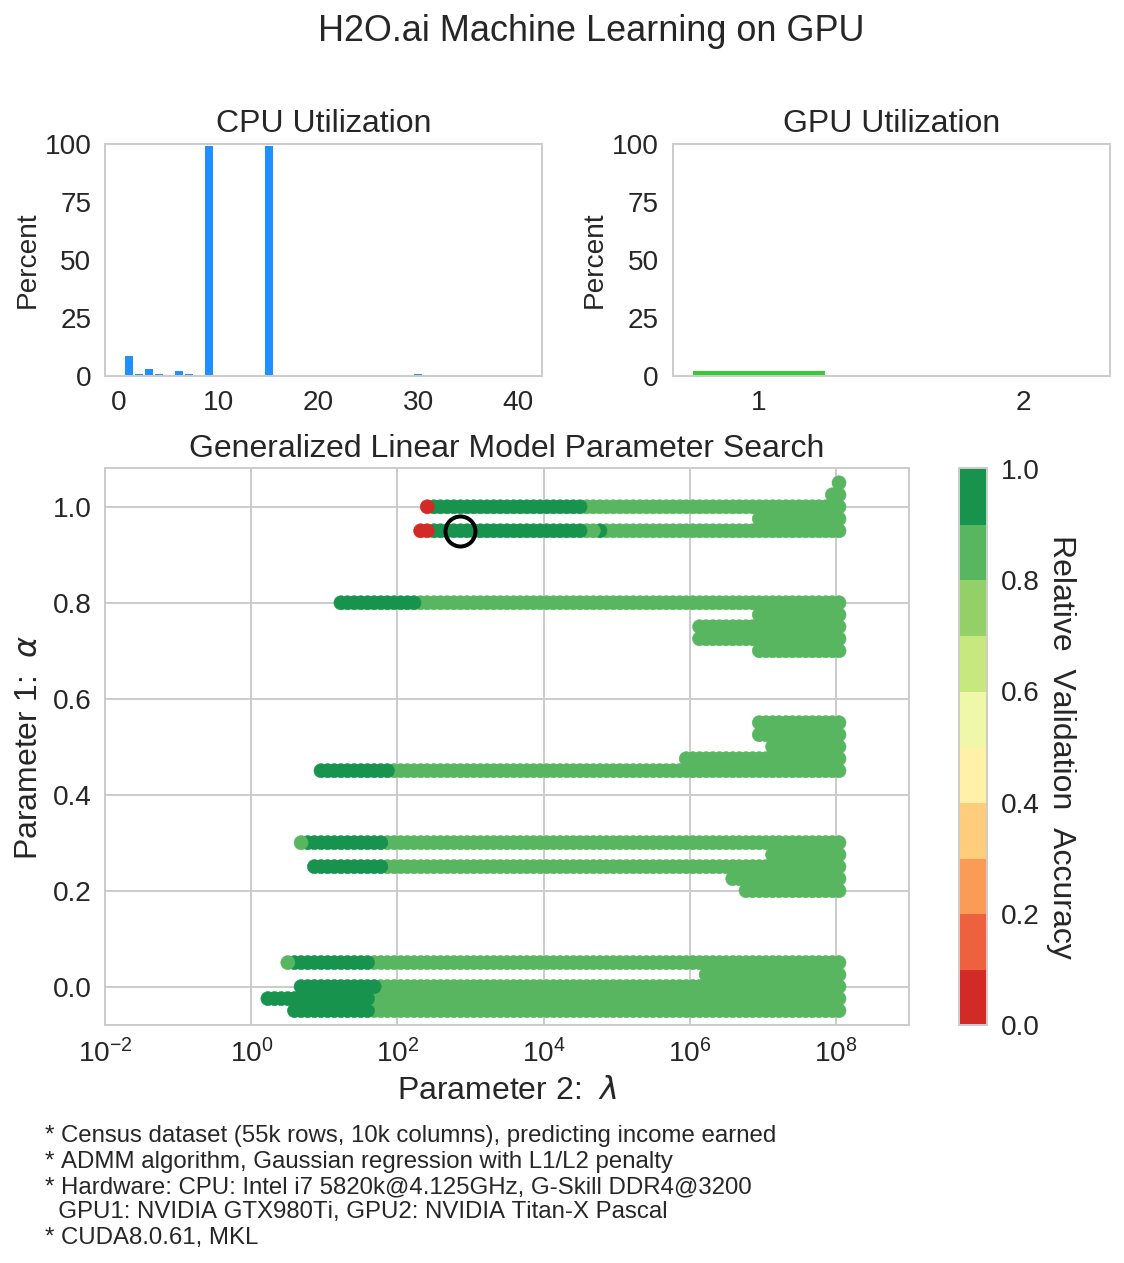

In [ ]:
# GPU RUN: nGPUs>0 for number of GPUs
# CPU RUN: nGPU=0 for CPU Run
nGPUs=maxNGPUS # choose all GPUs
# Model Size
nFolds=5
nAlphas=5
nLambdas=100
# Model Span
lambda_min_ratio=1E-9

if run==1 and anim==0:
    # Run Model
    arg = intercept,standardize, lambda_min_ratio, nFolds, nAlphas, nLambdas, nGPUs 
    RunH2Oaiglm(arg)

if run==1 and anim==1:
    from threading import Thread

    # Run Model
    arg = intercept,standardize, lambda_min_ratio, nFolds, nAlphas, nLambdas, nGPUs 
    background_thread = Thread(target=RunH2Oaiglm, args=(arg,))
    background_thread.start()

    # Show Animation
    import os
    path=os.getcwd()
    arg = nGPUs, path + "/rmse.txt"
    RunAnimation(arg)